In [123]:
#https://manipulandodados.com.br/teste-chi-quadrado-pearson-tabelas-de-contingencia/
#https://www.statisticshowto.datasciencecentral.com/probability-and-statistics/chi-square/
#https://en.wikipedia.org/wiki/Chi-squared_distribution
#https://en.wikipedia.org/wiki/Contingency_table
import pandas as pd
from scipy import stats
from statsmodels.stats import weightstats as stests
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import probplot,chi2_contingency
from scipy import stats
from statsmodels.stats import weightstats as stests

In [5]:
df_chi = pd.read_csv('bank-full.csv', delimiter=';')

In [104]:
df_chi.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [106]:
df_chi.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


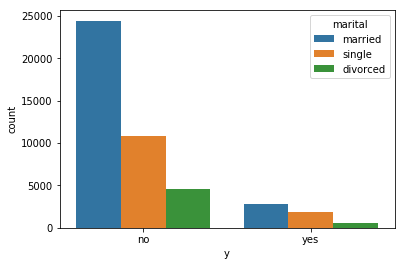

In [112]:
sns.countplot(data=df_chi,x='y',hue='marital')

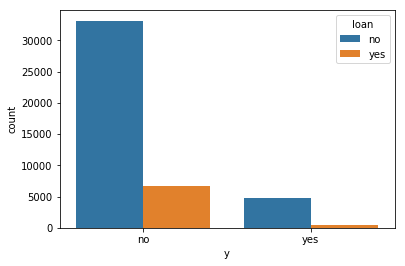

In [113]:
sns.countplot(data=df_chi,x='y',hue='loan')

/home/lucas/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


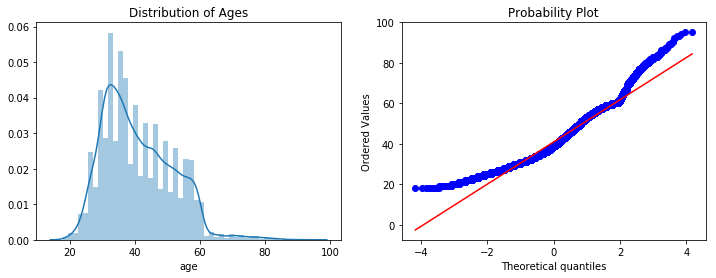

In [121]:
fig,(ax1,ax2)=plt.subplots(1,2)
fig.set_size_inches(12,4)

age_plotting=df_chi.loc[df_chi['age'].notnull(),'age'] #sns doesn't handle nan's
sns.distplot(age_plotting,ax=ax1)
ax1.set_title("Distribution of Ages")

x=probplot(age_plotting,plot=ax2)

## 1. Definição de Hipóteses

__Hipótese Nula__: $H_O$ a hipótese nula é uma afirmação geral ou posição padrão de que não há relação entre dois fenômenos medidos, ou nenhuma associação entre grupos. <p>
     É a hipótese assumida como ___verdadeira para a construção do teste___. É a teoria, o efeito ou a alternativa que se está interessado em testar.

__Hipóteses Alternativa__: $H_A$ é considerada quando a hipótese nula não tem evidência estatística ($H_O$)

![logos](https://cdn-images-1.medium.com/max/800/1*fEPOHXPQO_ZNJC4UQDXmqw.png)

## 2. Suposições e Condições

a. Independência:
- _Dentro dos Grupos: As observações amostradas devem ser independentes dentro de cada grupo._ 
    - Amostra aleatória / atribuição
    - Se amostragem sem reposição, n <10% da população total  
- _Entre Grupos: Dois grupos devem ser independentes um do outro (não pareados)_

b. *Tamanho da amostra / inclinação: cada amostra deve atender à condição de falha de sucesso::*
    $$n_{\rm child} p_{\rm child} \ge 10 \quad \textrm{and} \quad n_{\rm child} (1 - p_{\rm child}) \ge 10$$
    $$n_{\rm adult} p_{\rm adult} \ge 10 \quad \textrm{and} \quad n_{\rm adult} (1 - p_{\rm adult}) \ge 10$$

## Tabela de contingência
Em estatística , uma tabela de contingência (também conhecida como tabulação cruzada ou tabela de referência cruzada ) é um tipo de tabela em um formato de matriz que exibe a distribuição de frequência (multivariada) das variáveis. Eles são muito utilizados em pesquisa de opinião, inteligência de negócios, engenharia e pesquisa científica. Eles fornecem uma **imagem básica da inter-relação entre duas variáveis** e podem ajudar a encontrar interações entre elas.<p>

In [88]:
contingency_table=pd.crosstab(df_chi["marital"],df_chi["y"])
print('contingency_table :-\n',contingency_table)

contingency_table :-
 y            no   yes
marital              
divorced   4585   622
married   24459  2755
single    10878  1912


In [89]:
contingency_table

y,no,yes
marital,,
divorced,4585,622
married,24459,2755
single,10878,1912


## Tabela de Frequência
Quando se está a analisar um conjunto de dados, começa-se por considerar as diferentes categorias ou classes, e para cada uma delas calcula-se a sua **frequência absoluta obtendo-se a distribuição de frequências do conjunto de dados**. Esta distribuição de frequências é representada na forma de uma tabela, a que se dá o nome de tabela de frequências. Uma vez que existe alguma especificidade na fase da definição das classes, conforme o tipo dos dados a analisar, far-se-á essa distinção a seguir, nas indicações para a construção da tabela de frequências.

In [90]:
#Observed Values
Observed_Values = contingency_table.values 
print("Observed Values :-\n",Observed_Values)

Observed Values :-
 [[ 4585   622]
 [24459  2755]
 [10878  1912]]


In [91]:
b=stats.chi2_contingency(contingency_table)
Expected_Values = b[3]
print("Expected Values :-\n",Expected_Values)

Expected Values :-
 [[ 4597.86012254   609.13987746]
 [24030.37552808  3183.62447192]
 [11293.76434938  1496.23565062]]


In [95]:
no_of_rows=len(contingency_table.iloc[0:3,0])
no_of_columns=len(contingency_table.iloc[0,0:2])
df11=(no_of_rows-1)*(no_of_columns-1)
print("Degree of Freedom:-",df11)
alpha = 0.05

Degree of Freedom:- 2


In [96]:
no_of_rows

3

In [97]:
no_of_columns

2

In [98]:
from scipy.stats import chi2
chi_square=sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
chi_square_statistic=chi_square[0]+chi_square[1]
print("chi-square statistic:-",chi_square_statistic)

chi-square statistic:- 196.4959456560396


In [99]:
critical_value=chi2.ppf(q=1-alpha,df=df11)
print('critical_value:',critical_value)

critical_value: 5.991464547107979


In [100]:
#p-value
p_value=1-chi2.cdf(x=chi_square_statistic,df=df11)
print('p-value:',p_value)

p-value: 0.0


Teste **Chi-squared** <p> 
O teste é aplicado quando você tem duas variáveis ​​categóricas de uma única população. <p>
    É usado para determinar se existe uma associação significativa entre as duas variáveis.

Por exemplo, em uma **pesquisa eleitoral**, os eleitores podem ser classificados por gênero (masculino ou feminino) e por preferência de voto (democrata, republicano ou independente). Poderíamos usar um teste do qui-quadrado para independência para determinar se o gênero está relacionado à preferência de voto

Usos do **Chi-Square**<p>
A distribuição de qui-quadrado tem muitos uso nas estatística, incluindo:

- Estimativa do intervalo de confiança para um desvio padrão da população de uma distribuição normal de um desvio padrão da amostra.
- Independência de **dois critérios de classificação** de variáveis qualitativas .
- Relacionamentos entre **variáveis categóricas** ( tabelas de contingência ).
- Estudo de variância da amostra quando a distribuição subjacente é normal.
- Testes de desvios de diferenças entre frequências esperadas e observadas (tabelas unidirecionais).
- O teste do qui-quadrado (um teste de qualidade do ajuste ).

![logos](http://static1.squarespace.com/static/55ca1b41e4b0ee7818882387/55ca1be1e4b0b9f988aa7944/5b0598111ae6cf654a519751/1527094554753/UPSC-Result-2016-6.jpg)

1.Calculando chi-squared

In [101]:
print('Significance level: ',alpha)
print('Degree of Freedom: ',df11)
print('chi-square statistic:',chi_square_statistic)
print('critical_value:',critical_value)
print('p-value:',p_value)

Significance level:  0.05
Degree of Freedom:  2
chi-square statistic: 196.4959456560396
critical_value: 5.991464547107979
p-value: 0.0


In [122]:
if chi_square_statistic>=critical_value:
    print("Rejeitar H0,Existe uma relação entre duas variáveis categóricas")
else:
    print("Reter H0,Não há relação entre duas variáveis categóricas")
    
if p_value<=alpha:
    print("Rejeitar H0,Existe uma relação entre duas variáveis categóricas")
else:
    print("Reter H0,Não há relação entre duas variáveis categóricas")

Rejeite H0,Existe uma relação entre duas variáveis categóricas
Rejeite H0,Existe uma relação entre duas variáveis categóricas
